In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
import pickle
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

/home/mohand/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/mohand/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/mohand/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
data=pd.read_csv('../Data/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle (1).csv')

In [3]:
data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [4]:
data=data[['MONATSZAHL','AUSPRAEGUNG','JAHR','MONAT','WERT']]

In [5]:
data=data[data.JAHR<=2020]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 25 to 2085
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1911 non-null   object 
 1   AUSPRAEGUNG  1911 non-null   object 
 2   JAHR         1911 non-null   int64  
 3   MONAT        1911 non-null   object 
 4   WERT         1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 89.6+ KB


In [7]:
data.describe()

,JAHR,WERT
count,1911.000000,1911.000000
mean,2010.000000,1440.540031
std,6.056886,4655.514611
min,2000.000000,0.000000
25%,2005.000000,41.000000
50%,2010.000000,399.000000
75%,2015.000000,864.000000
max,2020.000000,46988.000000


there is a severe skewness in the # of accidents rates through years

# Check for Nans

In [8]:
data.isna().sum()/len(data)*100

MONATSZAHL     0.0
AUSPRAEGUNG    0.0
JAHR           0.0
MONAT          0.0
WERT           0.0
dtype: float64

Nans less than 5% of total data which will be acceptable if we drop rows with nans

In [9]:
#data.dropna(axis=0,inplace=True)

In [10]:
#len(data)

# Check types 

Categories

In [11]:
data.MONATSZAHL.unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

Type

In [12]:
data.AUSPRAEGUNG.unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

Year

In [13]:
data.JAHR.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])

Month

In [14]:
data.MONAT.unique()

array(['Summe', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '201505',
       '201506', '201507', '201508', '201509', '201510', '201511',
       '201512', '201401', '201402', '201403', '201404', '201405',
       '201406', '201407', '201408', '201409', '201410', '201411',
       '201412', '201301', '201302', '201303', '201304', '20130

In [15]:
data[data.MONAT=='Summe']['JAHR'].nunique()

21

# Feautre preprocessing

In [16]:
data=data[data.MONAT!='Summe']

In [17]:
data['MONAT']=data['MONAT'].str[-2:]

In [18]:
data.MONAT.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [19]:
data

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
26,Alkoholunfälle,insgesamt,2020,01,28.0
27,Alkoholunfälle,insgesamt,2020,02,40.0
28,Alkoholunfälle,insgesamt,2020,03,27.0
29,Alkoholunfälle,insgesamt,2020,04,26.0
30,Alkoholunfälle,insgesamt,2020,05,40.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,08,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,09,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


# Visualization

Distribution of no of Accidents

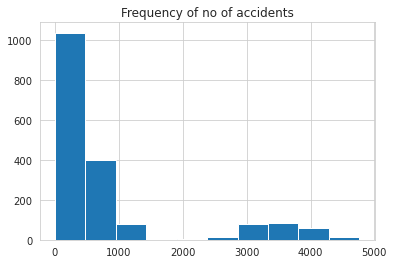

In [20]:
sns.set_style('whitegrid')
plt.title("Frequency of no of accidents")
data.WERT.hist() ;

<AxesSubplot:title={'center':'Frequency of no of accidents normalized distribution'}>

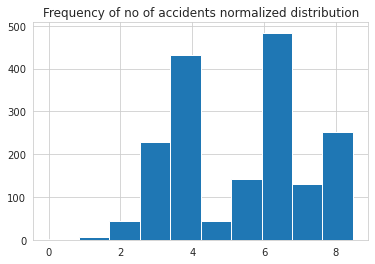

In [21]:
data['label']=np.log1p(data.WERT);
plt.title("Frequency of no of accidents normalized distribution");
data.label.hist()

Frequency of accidents per category

In [22]:
Accidents_per_category=data.groupby('MONATSZAHL')[['WERT']].sum()

In [23]:
Accidents_per_category

,WERT
MONATSZAHL,
Alkoholunfälle,16242.0
Fluchtunfälle,232928.0
Verkehrsunfälle,1127266.0


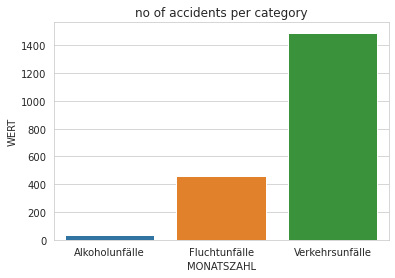

In [24]:
sns.barplot(data=Accidents_per_category,x=data.MONATSZAHL,y=data.WERT,ci=None);
plt.title('no of accidents per category');

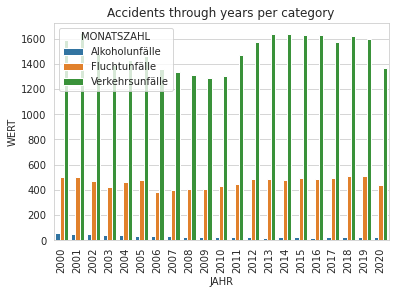

In [25]:
sns.barplot(data=data,x=data.JAHR,y=data.WERT,hue=data.MONATSZAHL,ci=None)
plt.xticks(rotation=90);
plt.title('Accidents through years per category') ;

Frequency of accidents per type

In [26]:
Accidents_per_type=data.groupby('AUSPRAEGUNG')[['WERT']].sum()

In [27]:
Accidents_per_type

,WERT
AUSPRAEGUNG,
Verletzte und Getötete,145434.0
insgesamt,1124016.0
mit Personenschäden,106986.0


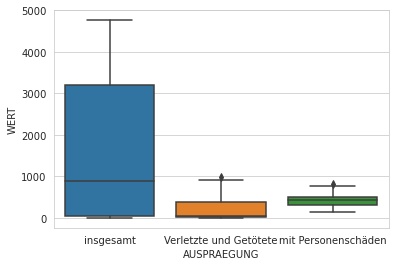

In [28]:
sns.boxplot(data=Accidents_per_type,x=data.AUSPRAEGUNG,y=data.WERT);

Accidents per month for each year

In [29]:
def Display_highest_month_per_year(year,data):
    
    data=data[data.JAHR==year]
    data_per_month=data.groupby('MONAT')[['WERT']].sum()
    sns.barplot(data=data_per_month,x=data.MONAT,y=data.WERT,ci=None);
    plt.title('no of accidents per month');

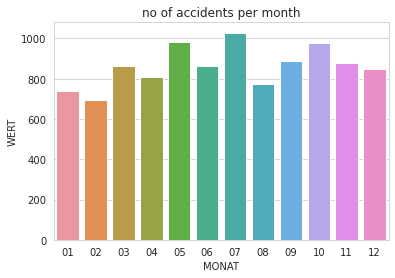

In [30]:
Display_highest_month_per_year(2001,data)

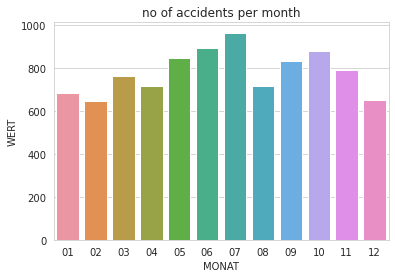

In [31]:
Display_highest_month_per_year(2002,data)

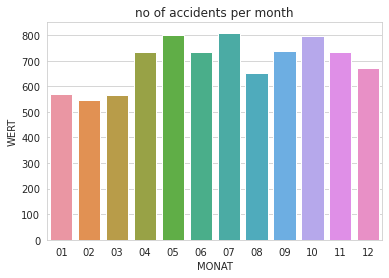

In [32]:
Display_highest_month_per_year(2007,data)

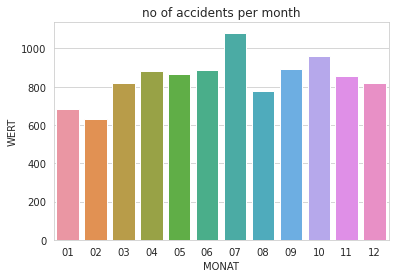

In [33]:
Display_highest_month_per_year(2015,data)

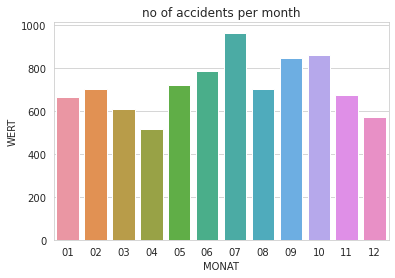

In [34]:
Display_highest_month_per_year(2020,data)

Accidents per year

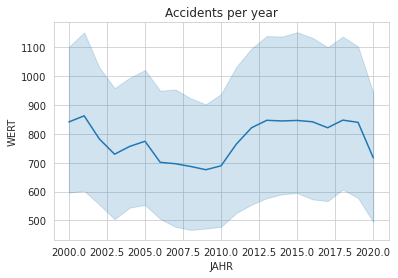

In [35]:
sns.lineplot(data=data,x=data.JAHR,y=data.WERT) ;
plt.title('Accidents per year');

# More insights to come

In [36]:
def Accidents_per_filter(data,year=None,month=None,category=None,typee=None):
    if year!=None:
        data=data[data.JAHR==year]
    if month!=None:
        data=data[data.MONAT==month]
    if category!=None:
        data=data[data.MONATSZAHL==category]
    if typee!=None:
        data=data[data.AUSPRAEGUNG==typee]
    
    return data
        
    

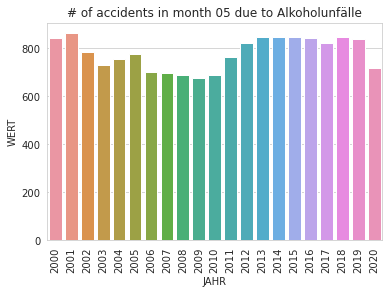

In [37]:
cat='Alkoholunfälle'
month='05'
data_01month_alchohol=Accidents_per_filter(data,year=None,month=month,category=cat,typee=None)
Accidents_per_type=data_01month_alchohol.groupby('JAHR')[['WERT']].sum()
sns.barplot(data=Accidents_per_type,x=data.JAHR,y=data.WERT,ci=None);
plt.title('# of accidents in month {} due to {}'.format(month,cat));
plt.xticks(rotation=90);

# Prepare for model

In [60]:
def prepare_data(data,datapoint,Prediction=False):
        if Prediction:
            data=pd.DataFrame(datapoint,index=['a'])

        data.JAHR=data.JAHR.astype(int)
        data.MONAT=data.MONAT.astype(int)

        data.MONATSZAHL=data.MONATSZAHL.replace({'Alkoholunfälle':0,'Fluchtunfälle':1,'Verkehrsunfälle':2})
        data.AUSPRAEGUNG=data.AUSPRAEGUNG.replace({'insgesamt':0,
                                                   'Verletzte und Getötete':1,'mit Personenschäden':2})
        

        Features=data[['MONATSZAHL','AUSPRAEGUNG','MONAT','JAHR']]
            
        return Features


In [61]:
def display_PredictionVsActual(y_test,y_pred):
    true=y_test[: 20].values
    predict=y_pred[: 20].reshape(20,1)
    yy=np.concatenate((true,predict),axis=1)
    Preds_table=pd.DataFrame(yy,columns=['true','predict'])
    return Preds_table
    

# Pipeline

In [62]:
Features=prepare_data(data,_,Prediction=False)

In [63]:
data.corr()['WERT']

MONATSZAHL     0.527138
AUSPRAEGUNG    0.428002
JAHR           0.013123
MONAT          0.032393
WERT           1.000000
label          0.790486
Name: WERT, dtype: float64

In [64]:
Label=data[['WERT']]

In [65]:
X_train,X_test,y_train,y_test = train_test_split(Features,Label,test_size=0.1,random_state=1)

# Parameters Tuning

In [106]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 20, num = 2)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid, cv = 5, n_iter=100,return_train_score=True)

rf_random.fit(X_train, np.log1p(y_train))

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConvers

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   return_train_score=True)

In [107]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [108]:
pipe = Pipeline([('scaler', StandardScaler()), ('rf', rf_random.best_estimator_)]);
pipe.fit(X_train, np.log1p(y_train));

/home/mohand/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [109]:
predictions=pipe.predict(X_test)

In [110]:
np.sqrt(mean_squared_error(np.log1p(y_test),predictions))

0.1835630765630682

In [111]:
display_PredictionVsActual(y_test,np.exp(predictions))

,true,predict
0,752.0,833.009458
1,1110.0,1032.498483
2,477.0,519.842214
3,20.0,37.740292
4,2903.0,2928.867724
5,2953.0,3152.214396
6,3839.0,3784.623938
7,1019.0,987.017536
8,297.0,345.978370
9,480.0,472.514640


# Make prediction

In [112]:

datapoint={
    
'MONATSZAHL': 'Alkoholunfälle',
'AUSPRAEGUNG': 'insgesamt',
'MONAT': '01',
'JAHR': '2021'
    
}

In [113]:
point=prepare_data(data,datapoint=datapoint,Prediction=True)

In [114]:
point

,MONATSZAHL,AUSPRAEGUNG,MONAT,JAHR
a,0,0,1,2021


In [115]:
np.exp(pipe.predict(point)[0])

17.351874600904676

# Save the Model

In [117]:
pickle.dump(pipe,open("reg_model_",'wb'))